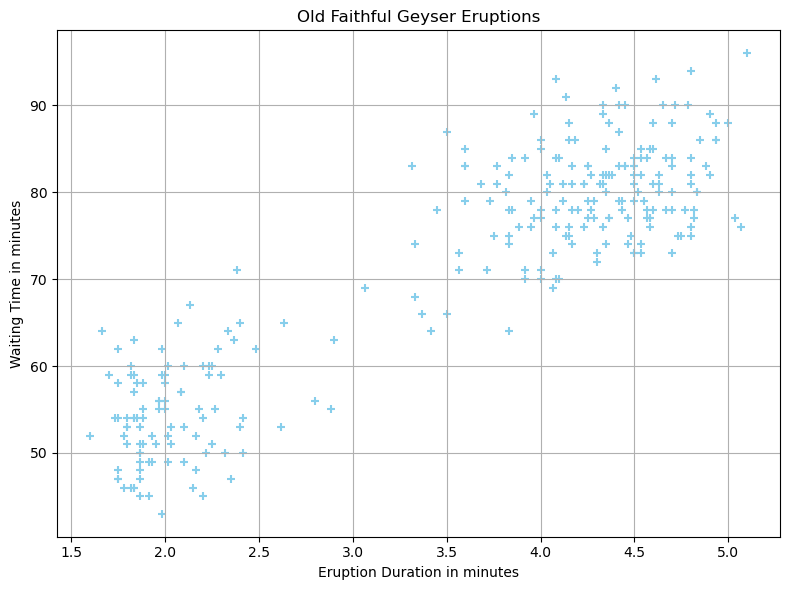

In [9]:
##Problem 1(a)

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
geyser_data = pd.read_csv('/Users/omkarkalekar/Downloads/faithful.csv')  # Make sure the CSV file is in the same directory

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(geyser_data['eruptions'], geyser_data['waiting'], color='skyblue', marker= '+', alpha=1.0)
plt.title('Old Faithful Geyser Eruptions')
plt.xlabel('Eruption Duration in minutes')
plt.ylabel('Waiting Time in minutes')
plt.grid(True)
plt.tight_layout()
plt.show()


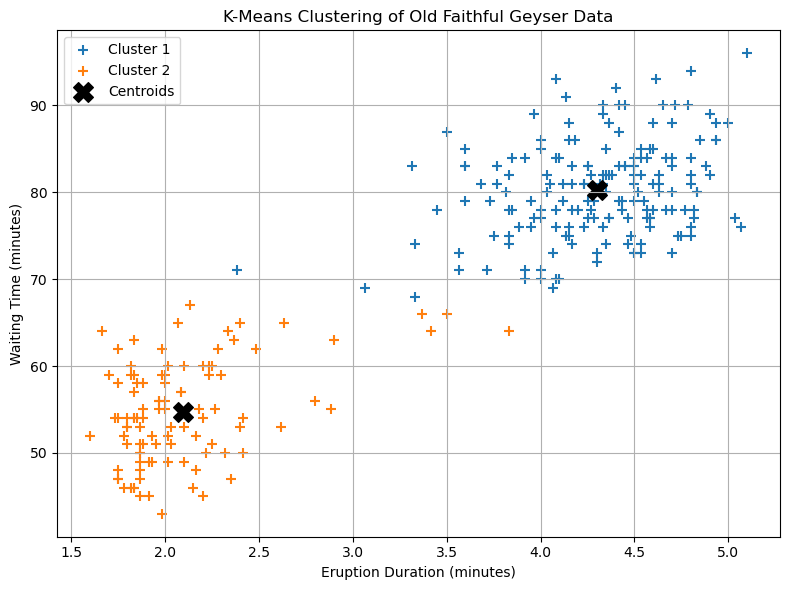

In [15]:
#Problem 2a
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Old Faithful dataset
geyser_data = pd.read_csv('/Users/omkarkalekar/Downloads/faithful.csv')  # Make sure the CSV file is in the same directory

# Extract the two features: 'eruptions' and 'waiting'
X = geyser_data[['eruptions', 'waiting']].values

# Implement K-Means from scratch
class KMeansFromScratch:
    def __init__(self, n_clusters=2, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])
        self.centroids = X[random_idx[:self.n_clusters]]

        for _ in range(self.max_iters):
            self.labels = self._assign_clusters(X)
            old_centroids = self.centroids.copy()
            self.centroids = self._calculate_centroids(X)
            if np.linalg.norm(self.centroids - old_centroids) < self.tol:
                break

    def _assign_clusters(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

    def _compute_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - self.centroids[k], axis=1)
        return distances

    def _calculate_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            if np.any(self.labels == k):
                centroids[k] = X[self.labels == k].mean(axis=0)
            else:  # Handle empty cluster
                centroids[k] = X[np.random.randint(0, X.shape[0])]
        return centroids

    def predict(self, X):
        return self._assign_clusters(X)

# Create an instance of the KMeansFromScratch class
kmeans = KMeansFromScratch(n_clusters=2)
kmeans.fit(X)

# Plot the clustered results
plt.figure(figsize=(8, 6))

# Scatter plot each cluster separately
for cluster in range(2):
    plt.scatter(X[kmeans.labels == cluster, 0], X[kmeans.labels == cluster, 1], label=f'Cluster {cluster+1}', s=50, marker='+')

# Plot centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, color='black', marker='X', label='Centroids')

# Customize the plot
plt.title('K-Means Clustering of Old Faithful Geyser Data')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


K-Means converged in 4 iterations.
Final Objective Function Value: 8901.77


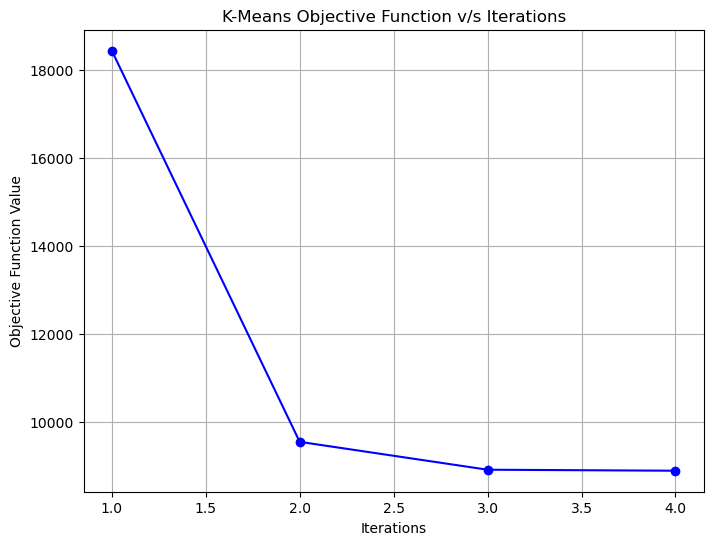

In [21]:
#problem 2c Plot Objective Function vs Iterations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

data = pd.read_csv('/Users/omkarkalekar/Downloads/faithful.csv')
X = data[['eruptions', 'waiting']].values

def k_means_numpy(X, k, max_iters=100, seed=42):
    np.random.seed(seed)
    centers = X[np.random.choice(len(X), k, replace=False)]
    objective_values = []

    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        distances = np.sum((X - centers[labels])**2, axis=1)
        objective = np.sum(distances)
        objective_values.append(objective)

        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    return centers, labels, objective_values

k = 2
centers, labels, objective_values = k_means_numpy(X, k)

print(f"K-Means converged in {len(objective_values)} iterations.")
print(f"Final Objective Function Value: {objective_values[-1]:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, color='blue',marker='o')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('K-Means Objective Function v/s Iterations')
plt.grid(True)
plt.savefig("K-Means_Objective_versus_Iterations.png", dpi=300)
plt.show()